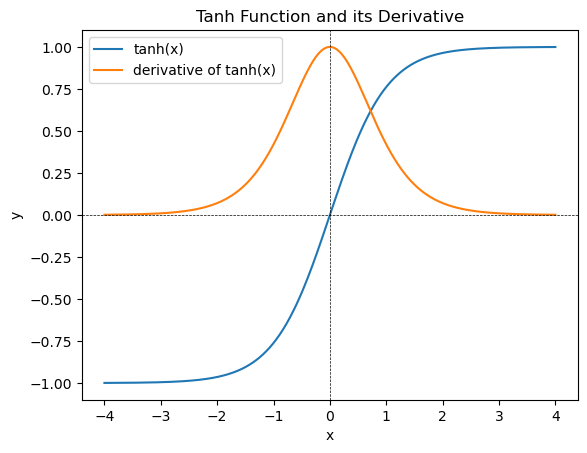

In [65]:
import numpy as np
import matplotlib.pyplot as plt
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
def plotTanhx():
    #derivative = 1 - (tanh(x))^2
    x = np.linspace(-4,4,400)
    y = tanh(x)
    ddash = 1 - y**2
    
    plt.plot(x,y,label = "tanh(x)")
    plt.plot(x,ddash, label ="derivative of tanh(x)")
    plt.title("Tanh Function and its Derivative")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
    plt.legend()
    #plt.grid()
    plt.show()
plotTanhx()

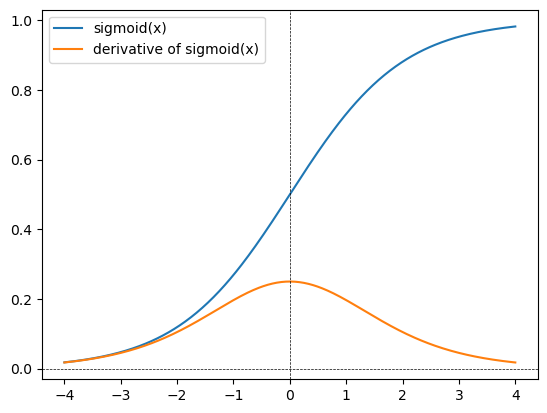

In [81]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))
def plotSigmoid():
    x = np.linspace(-4,4 ,400)
    y = sigmoid(x)
    derivative = sigmoid(x)*(1- sigmoid(x))
    plt.plot(x,y,label = "sigmoid(x)")
    plt.plot(x,derivative, label ="derivative of sigmoid(x)")
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
 
    plt.legend()
plotSigmoid()

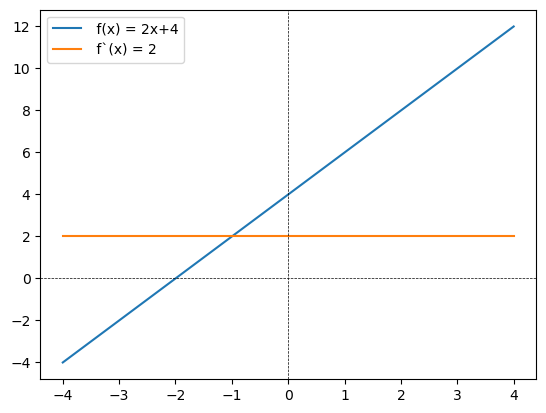

In [99]:
def LinearDerivative(x):
    return 2*1 + 0*x ;
def plotLinear():
    x = np.linspace(-4,4,400)
    y = 2*x+4
    derivative = LinearDerivative(x)
    plt.plot(x,y,label = " f(x) = 2x+4")
    plt.plot(x,LinearDerivative(x), label =" f`(x) = 2")
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
    plt.legend()
plotLinear()

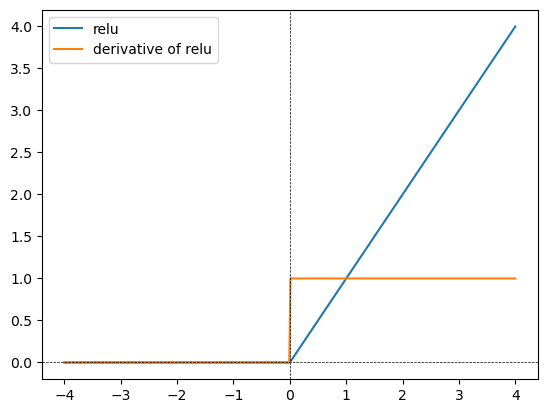

In [125]:
def relu(x):
    return np.maximum(0,x)

def derivativeRelu(x):
    return np.where(x > 0 ,1,0)
def plotRelu():
    x = np.linspace(-4,4,400)
    y = relu(x)
    der = derivativeRelu(x)
    plt.plot(x,y,label ="relu")
    plt.plot(x,der, label ="derivative of relu")
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
    plt.legend()
plotRelu()
    

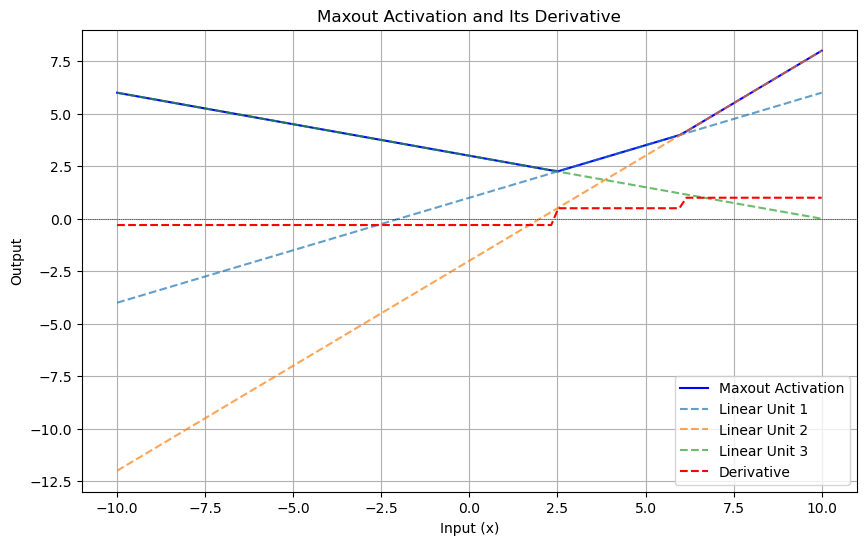

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Define Maxout activation function
def maxout(x, W, b):
    # Compute the linear functions and take the maximum
    linear_outputs = [x * w + b_i for w, b_i in zip(W, b)]
    return np.max(linear_outputs, axis=0), linear_outputs

# Derivative of Maxout
def maxout_derivative(x, W, b):
    # Compute the linear outputs
    linear_outputs = [x * w + b_i for w, b_i in zip(W, b)]
    max_indices = np.argmax(linear_outputs, axis=0)  # Index of max output
    derivatives = np.zeros_like(x)
    
    # Compute derivative based on the max linear function
    for idx, max_idx in enumerate(max_indices):
        derivatives[idx] = W[max_idx]
    return derivatives

# Simulation
def simulate_maxout():
    # Define input range
    x = np.linspace(-10, 10, 100)

    # Define weights and biases for 3 linear units
    W = [0.5, 1.0, -0.3]  # Slopes
    b = [1, -2, 3]         # Biases

    # Compute Maxout activation
    y, linear_outputs = maxout(x, W, b)

    # Compute derivative
    dy_dx = maxout_derivative(x, W, b)

    # Plot Maxout function
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label="Maxout Activation", color='blue')
    for i, linear_output in enumerate(linear_outputs):
        plt.plot(x, linear_output, '--', label=f"Linear Unit {i+1}", alpha=0.7)
    plt.plot(x, dy_dx, label="Derivative", color='red', linestyle='dashed')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='dotted')
    plt.title("Maxout Activation and Its Derivative")
    plt.xlabel("Input (x)")
    plt.ylabel("Output")
    plt.legend()
    plt.grid()
    plt.show()

simulate_maxout()


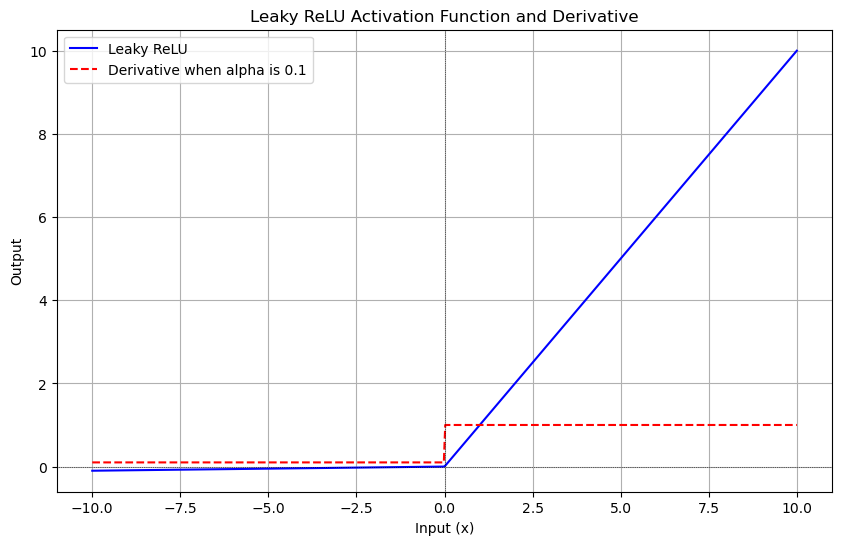

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define Leaky ReLU activation function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Define the derivative of Leaky ReLU
def leaky_relu_derivative(x, alpha=0.1):
    return np.where(x > 0, 1, alpha)

# Plot Leaky ReLU and its derivative
def plot_leaky_relu():
    # Input range
    x = np.linspace(-10, 10, 500)

    # Compute Leaky ReLU and its derivative
    y = leaky_relu(x)
    dy_dx = leaky_relu_derivative(x)

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label="Leaky ReLU", color="blue")
    plt.plot(x, dy_dx, label="Derivative when alpha is 0.1", color="red", linestyle="dashed")
    plt.axhline(0, color="black", linewidth=0.5, linestyle="dotted")
    plt.axvline(0, color="black", linewidth=0.5, linestyle="dotted")
    plt.title("Leaky ReLU Activation Function and Derivative")
    plt.xlabel("Input (x)")
    plt.ylabel("Output")
    plt.legend()
    plt.grid()
    plt.show()

plot_leaky_relu()


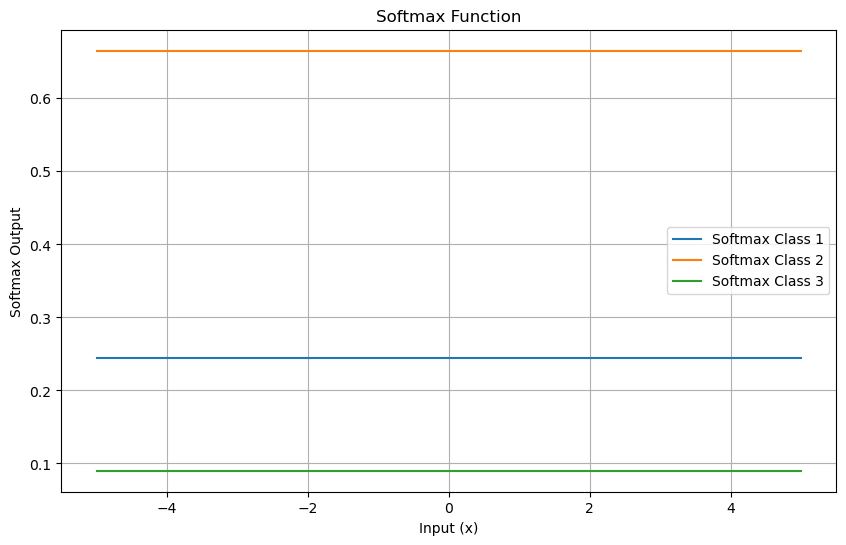

Softmax Output: [0.09003057 0.24472847 0.66524096]
Jacobian Matrix of Derivative:
[[ 0.08192507 -0.02203304 -0.05989202]
 [-0.02203304  0.18483645 -0.1628034 ]
 [-0.05989202 -0.1628034   0.22269543]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_x / np.sum(exp_x, axis=0)

# Derivative of the softmax function
def softmax_derivative(softmax_values):
    n = len(softmax_values)
    jacobian_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                jacobian_matrix[i][j] = softmax_values[i] * (1 - softmax_values[i])
            else:
                jacobian_matrix[i][j] = -softmax_values[i] * softmax_values[j]
    return jacobian_matrix

# Simulation
def simulate_softmax():
    # Define input values
    x = np.linspace(-5, 5, 100)
    inputs = np.array([x, x+1, x-1])  # Example for 3 classes

    # Compute softmax for each input set
    softmax_values = np.array([softmax(row) for row in inputs.T]).T

    # Plot the softmax function for each class
    plt.figure(figsize=(10, 6))
    for i in range(softmax_values.shape[0]):
        plt.plot(x, softmax_values[i], label=f"Softmax Class {i+1}")

    plt.title("Softmax Function")
    plt.xlabel("Input (x)")
    plt.ylabel("Softmax Output")
    plt.legend()
    plt.grid()
    plt.show()

    # Compute derivative at a specific input
    test_input = np.array([1.0, 2.0, 3.0])  # Example input
    softmax_out = softmax(test_input)
    jacobian = softmax_derivative(softmax_out)

    print("Softmax Output:", softmax_out)
    print("Jacobian Matrix of Derivative:")
    print(jacobian)

simulate_softmax()


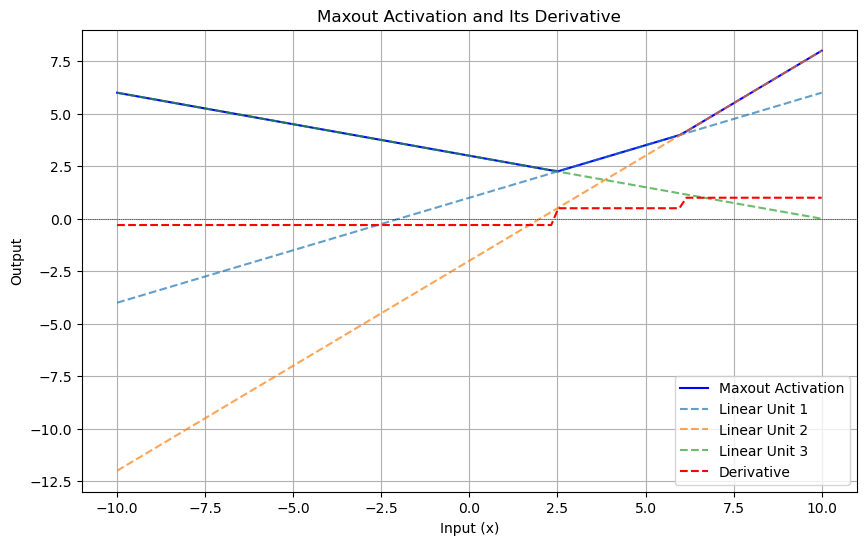

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Define Maxout activation function
def maxout(x, W, b):
    # Compute the linear functions and take the maximum
    linear_outputs = [x * w + b_i for w, b_i in zip(W, b)]
    return np.max(linear_outputs, axis=0), linear_outputs

# Derivative of Maxout
def maxout_derivative(x, W, b):
    # Compute the linear outputs
    linear_outputs = [x * w + b_i for w, b_i in zip(W, b)]
    max_indices = np.argmax(linear_outputs, axis=0)  # Index of max output
    derivatives = np.zeros_like(x)
    
    # Compute derivative based on the max linear function
    for idx, max_idx in enumerate(max_indices):
        derivatives[idx] = W[max_idx]
    return derivatives

# Simulation
def simulate_maxout():
    # Define input range
    x = np.linspace(-10, 10, 100)

    # Define weights and biases for 3 linear units
    W = [0.5, 1.0, -0.3]  # Slopes
    b = [1, -2, 3]         # Biases

    # Compute Maxout activation
    y, linear_outputs = maxout(x, W, b)

    # Compute derivative
    dy_dx = maxout_derivative(x, W, b)

    # Plot Maxout function
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label="Maxout Activation", color='blue')
    for i, linear_output in enumerate(linear_outputs):
        plt.plot(x, linear_output, '--', label=f"Linear Unit {i+1}", alpha=0.7)
    plt.plot(x, dy_dx, label="Derivative", color='red', linestyle='dashed')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='dotted')
    plt.title("Maxout Activation and Its Derivative")
    plt.xlabel("Input (x)")
    plt.ylabel("Output")
    plt.legend()
    plt.grid()
    plt.show()

simulate_maxout()


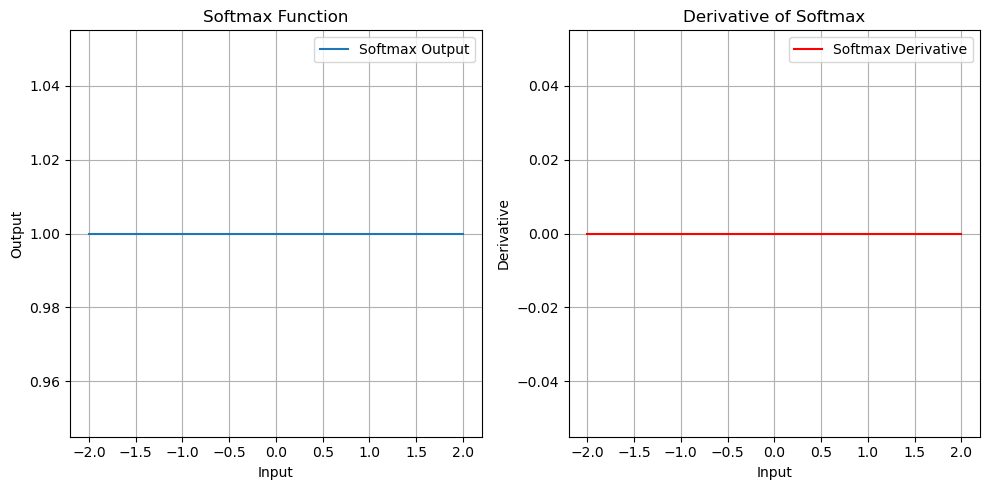

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x))  # Subtract max(x) for numerical stability
    return e_x / e_x.sum(axis=0)

# Define the derivative of the softmax function
def softmax_derivative(softmax_output):
    # Jacobian matrix for softmax derivative
    s = softmax_output.reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)

# Generate a range of inputs
x = np.linspace(-2, 2, 100)
softmax_values = np.array([softmax(xi) for xi in x])

# Calculate the derivatives for each value
softmax_derivatives = np.array([softmax_derivative(softmax(xi))[0, 0] for xi in x])

# Plot the softmax function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, softmax_values, label="Softmax Output")
plt.title("Softmax Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid()

# Plot the derivative of the softmax function
plt.subplot(1, 2, 2)
plt.plot(x, softmax_derivatives, label="Softmax Derivative", color="red")
plt.title("Derivative of Softmax")
plt.xlabel("Input")
plt.ylabel("Derivative")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


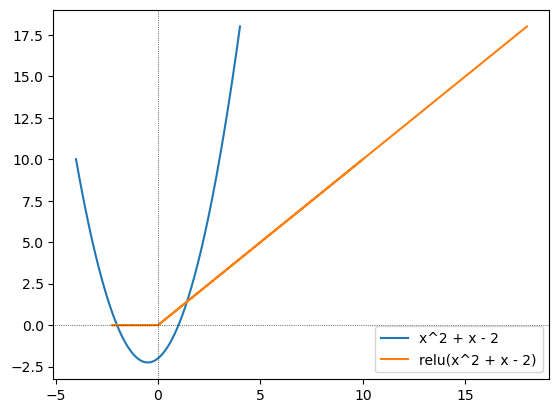

In [95]:
def apply_relu(y):
    return np.where(y > 0 ,y, 0)
    
x = np.linspace(-4,4, 500)
y = x*x + x-2
plt.plot(x,y, label = "x^2 + x - 2")
z = apply_relu(y)
plt.plot(y,z, label ="relu(x^2 + x - 2)")

plt.axhline(0, color='black', linewidth=0.5, linestyle='dotted')
plt.axvline(0, color="black", linewidth=0.5, linestyle="dotted")
plt.legend()

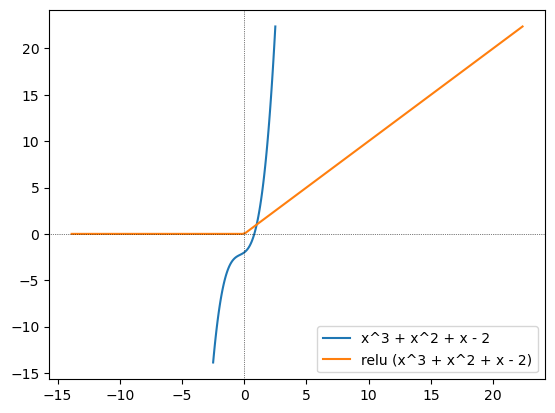

In [93]:
def apply_relu(y):
    return np.where(y > 0 ,y, 0)
    
x = np.linspace(-2.5,2.5, 100)
y = x*x*x + x*x + x -2
plt.plot(x,y, label ="x^3 + x^2 + x - 2")
z = apply_relu(y)
plt.plot(y,z,label ="relu (x^3 + x^2 + x - 2)")
plt.axvline(0, color="black", linewidth=0.5, linestyle="dotted")
plt.axhline(0, color='black', linewidth=0.5, linestyle='dotted')
plt.legend()

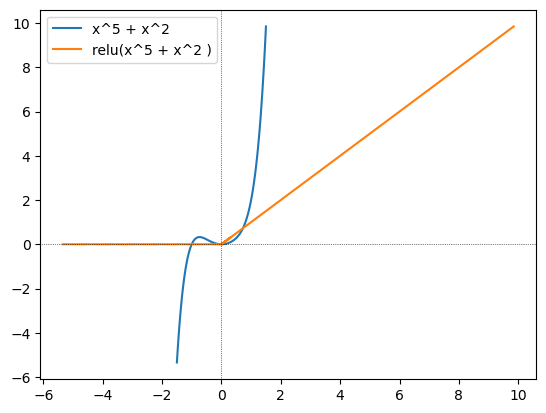

In [91]:
def apply_relu(y):
    return np.where(y > 0 ,y, 0)
    
x = np.linspace(-1.5,1.5, 100)
y = x**5 + x**2 
plt.plot(x,y,label ="x^5 + x^2 ")
z = apply_relu(y)
plt.plot(y,z, label = "relu(x^5 + x^2 )")
plt.axvline(0, color="black", linewidth=0.5, linestyle="dotted")
plt.axhline(0, color='black', linewidth=0.5, linestyle='dotted')
plt.legend()

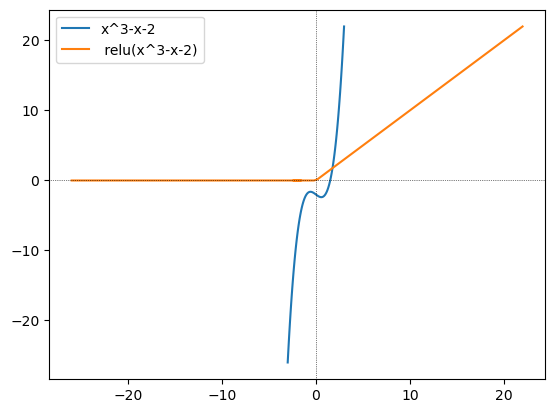

In [83]:
def apply_relu(y):
    return np.where(y > 0 ,y, 0)
    
x = np.linspace(-3,3, 100)
y = x**3-x-2
plt.plot(x,y,label ="x^3-x-2")
z = apply_relu(y)
plt.plot(y,z, label =" relu(x^3-x-2)")
plt.axvline(0, color="black", linewidth=0.5, linestyle="dotted")
plt.axhline(0, color='black', linewidth=0.5, linestyle='dotted')
plt.legend()

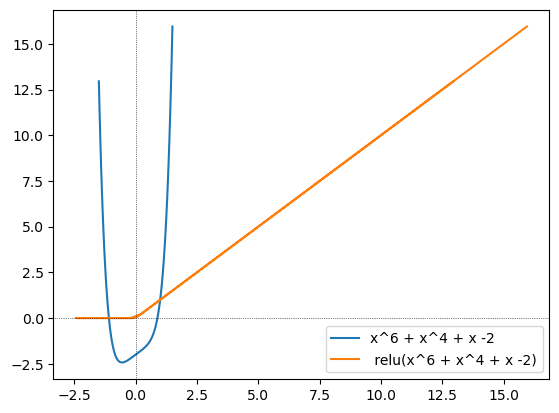

In [85]:
def apply_relu(y):
    return np.where(y > 0 ,y, 0)
    
x = np.linspace(-1.5,1.5,100)
y = x**6 + x**4 + x -2
plt.plot(x,y, label ="x^6 + x^4 + x -2")
z = apply_relu(y)
plt.plot(y,z , label =" relu(x^6 + x^4 + x -2)")
plt.axvline(0, color="black", linewidth=0.5, linestyle="dotted")
plt.axhline(0, color='black', linewidth=0.5, linestyle='dotted')
plt.legend()